 <font size="6">**This is project regarding Student adaptability level for online education** </font>

In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


Libraries used are -
1. Numpy (for mathematical calculations)
2. Pandas (To read dataset)
3. Matplotlib and Seaborn (visualization)
4. sklearn (model training and analysis)

In [84]:
data= pd.read_csv('/content/students_adaptability_level_online_education.csv')
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [85]:
data.shape

(1205, 14)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


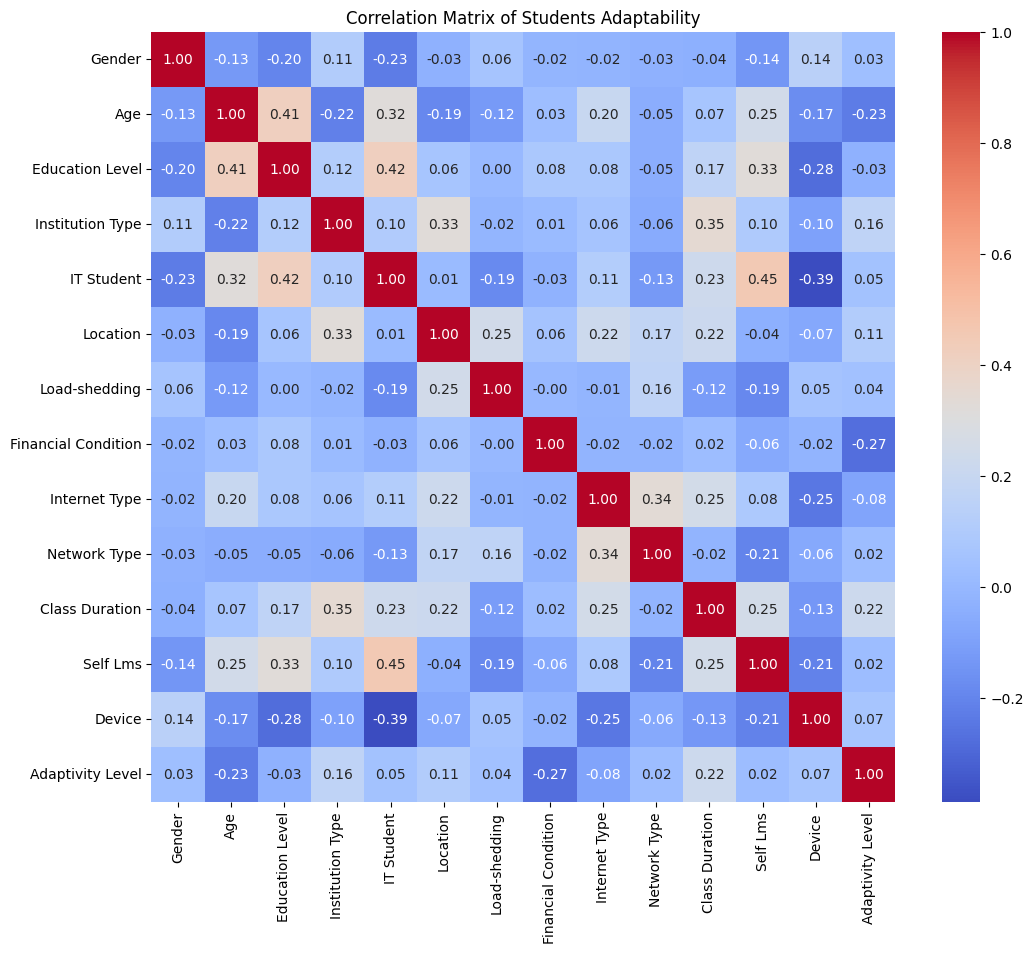

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Calculate the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Students Adaptability')
plt.show()

In [88]:
threshold = 0.4
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix > threshold) & (correlation_matrix < 1.0)
).stack().reset_index()

high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
print(high_corr_pairs)


          Feature1         Feature2  Correlation
0              Age  Education Level     0.414985
1  Education Level              Age     0.414985
2  Education Level       IT Student     0.415967
3       IT Student  Education Level     0.415967
4       IT Student         Self Lms     0.453429
5         Self Lms       IT Student     0.453429


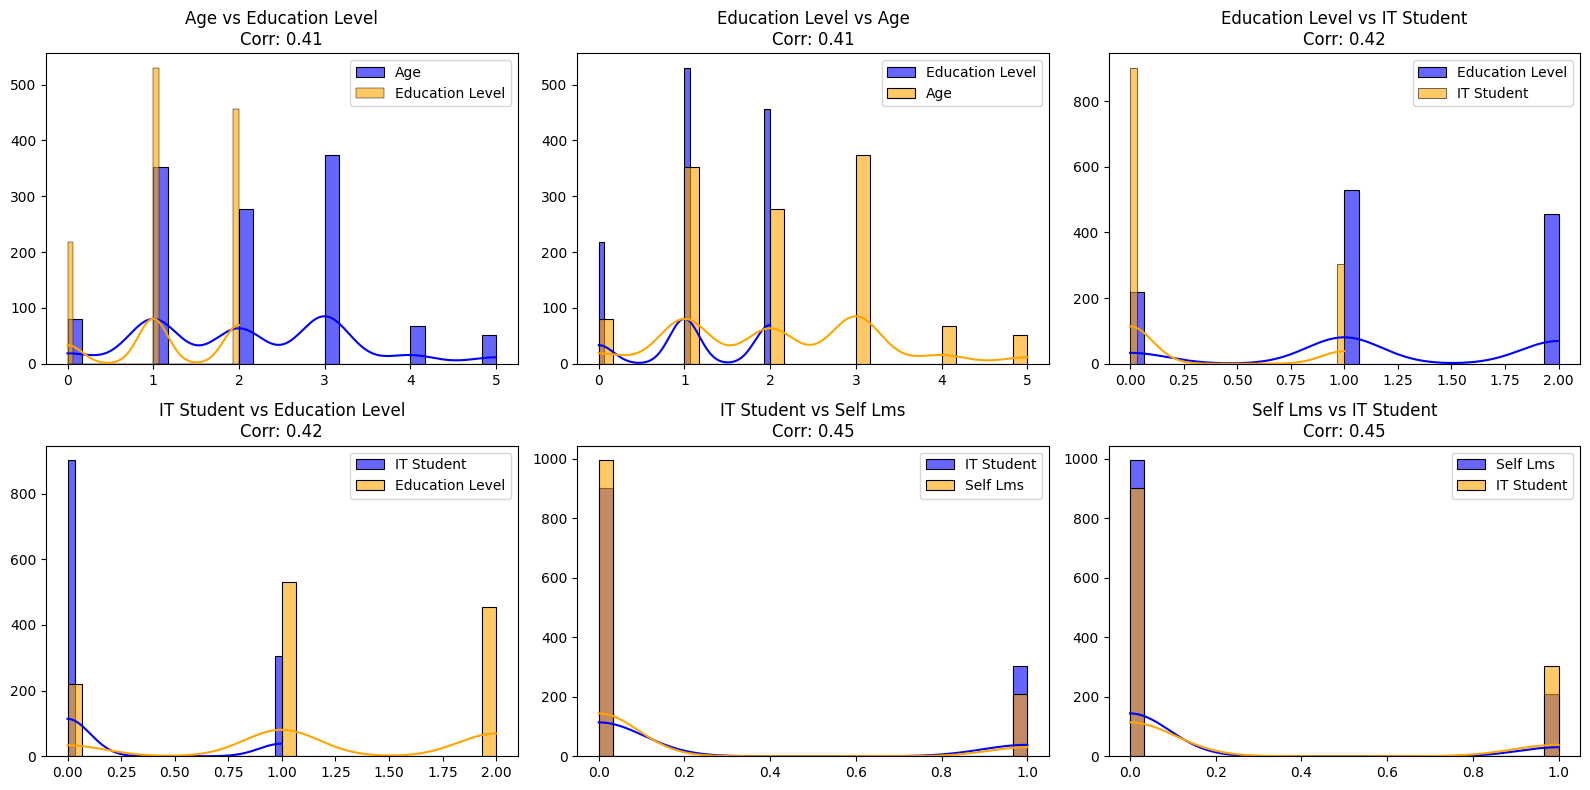

In [89]:
import math
plots_per_row = 3
num_plots = len(high_corr_pairs)
num_rows = math.ceil(num_plots / plots_per_row)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 4))
axes = axes.flatten()
for idx, (_, row) in enumerate(high_corr_pairs.iterrows()):
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    correlation = row['Correlation']

    ax = axes[idx]
    if pd.api.types.is_numeric_dtype(data[feature1]) and pd.api.types.is_numeric_dtype(data[feature2]):
        sns.histplot(data[feature1], kde=True, color='blue', label=feature1, bins=30, alpha=0.6, ax=ax)
        sns.histplot(data[feature2], kde=True, color='orange', label=feature2, bins=30, alpha=0.6, ax=ax)
        ax.set_title(f"{feature1} vs {feature2}\nCorr: {correlation:.2f}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend()
    elif pd.api.types.is_numeric_dtype(data[feature1]) and not pd.api.types.is_numeric_dtype(data[feature2]):
        sns.barplot(x=data[feature2], y=data[feature1], ci=None, ax=ax)
        ax.set_title(f"{feature1} by {feature2}\nCorr: {correlation:.2f}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=45)

    elif not pd.api.types.is_numeric_dtype(data[feature1]) and pd.api.types.is_numeric_dtype(data[feature2]):
        sns.barplot(x=data[feature1], y=data[feature2], ci=None, ax=ax)
        ax.set_title(f"{feature2} by {feature1}\nCorr: {correlation:.2f}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=45)
    else:
        crosstab = pd.crosstab(data[feature1], data[feature2], normalize='index')
        crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax, legend=False, alpha=0.75)
        ax.set_title(f"{feature1} vs {feature2}\nCorr: {correlation:.2f}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=45)
for idx in range(len(high_corr_pairs), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


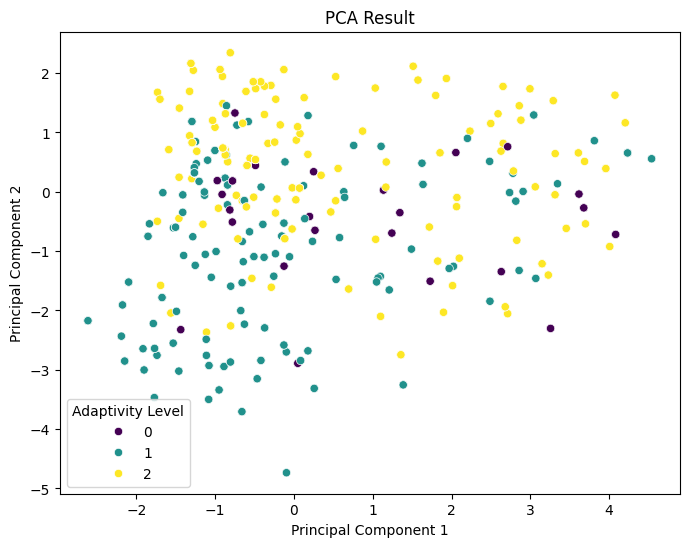

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualize of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Adaptivity Level'], palette='viridis')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


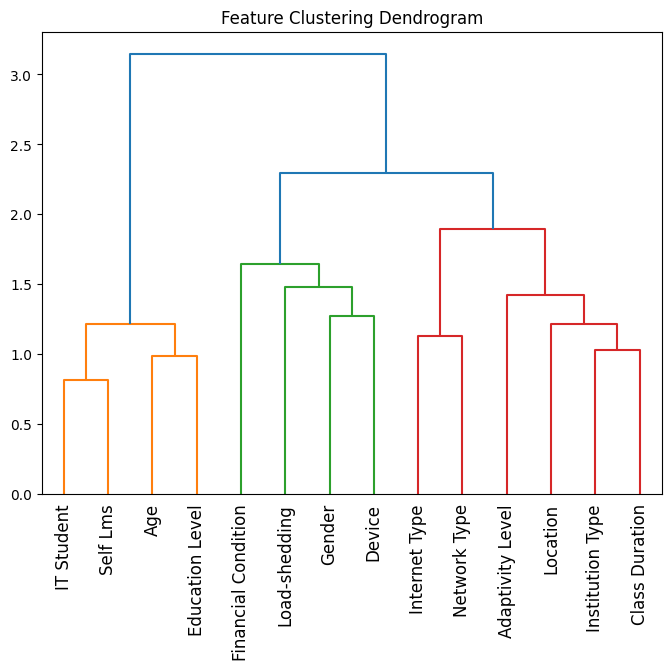

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
#performing clustering and visualising using dendogram
linkage_result = linkage(correlation_matrix, method='ward')
plt.figure(figsize=(8,6))
dendrogram(linkage_result, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title('Feature Clustering Dendrogram')
plt.show()


<font size="6">Feature and Label creation</font>

X is the dataframe of all the features , and y is the dataframe for the labels of adaptability in online education.


In [92]:
from sklearn.model_selection import train_test_split
X = data.drop('Adaptivity Level', axis=1)
y = data['Adaptivity Level']
# dividing data into train and test , here 80% test and rest as train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(964, 13) (964,)
(241, 13) (241,)


<font size="6">Here, I use random forest and SVM for classification</font>

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# initialzing random forest , svm and then training of them
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC()

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Evaluating  Random Forest,SVM
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


print("SVM Accuracy:", accuracy_score(y_test, svc_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svc_predictions))


Random Forest Accuracy: 0.9087136929460581
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.91      0.92      0.91        96
           2       0.91      0.94      0.92       125

    accuracy                           0.91       241
   macro avg       0.92      0.85      0.88       241
weighted avg       0.91      0.91      0.91       241

SVM Accuracy: 0.7344398340248963
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        20
           1       0.78      0.65      0.71        96
           2       0.71      0.86      0.78       125

    accuracy                           0.73       241
   macro avg       0.72      0.63      0.66       241
weighted avg       0.74      0.73      0.73       241



<font size="4"> Confusion matrix for random forest and SVM </font>

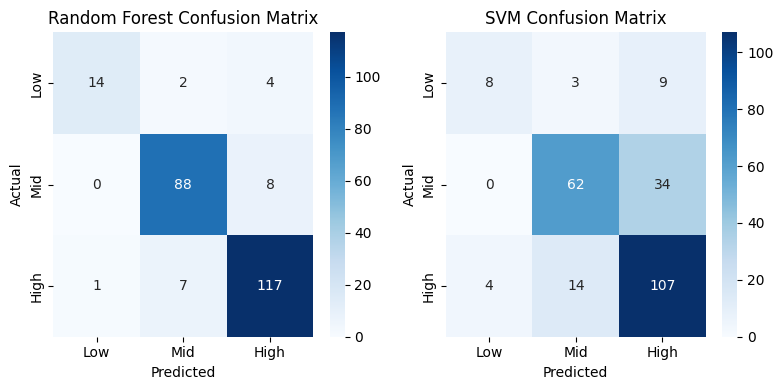

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# printing confusion matrix of random forest and svm
rf_cm = confusion_matrix(y_test, rf_predictions)
svc_cm = confusion_matrix(y_test, svc_predictions)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'], ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'], ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.tight_layout()
plt.show()


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize linear regression ,train and test it
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("Linear Regression R²:", r2_score(y_test, lr_predictions))

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Random Forest R²:", r2_score(y_test, rf_predictions))


Linear Regression RMSE: 0.5720909892957367
Linear Regression R²: 0.2053001614532428
Random Forest RMSE: 0.332400932404914
Random Forest R²: 0.7317143916028003


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


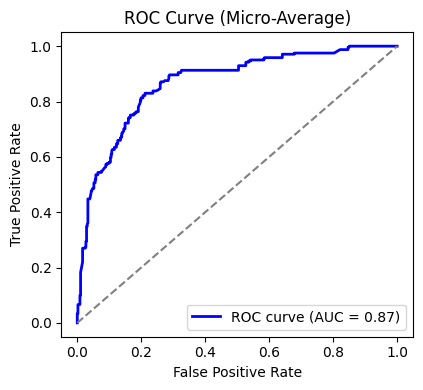

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

#  roc curve for logistic regression
lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train, y_train)
lr_probabilities = lr_model.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], lr_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), lr_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr["micro"], tpr["micro"], color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-Average)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

<font size="5">Here we are getting close to 91% accuracy in the model</font>

In [97]:
# using cross valdation upto 5 folds
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.94190871 0.91701245 0.89211618 0.90041494 0.8879668 ]
Mean CV Accuracy: 0.9078838174273859
